### ==================================================================================
## Introdução à Ciência de Dados e Decisões 
## Fundamentos da Aprendizagem de Máquina - Machine Learning

### ==================================================================================
Ricardo Augusto

### ==================================================================================
Exercício Computacional - 3 - Modelos de Redes Neurais Artificiais com Framework Keras

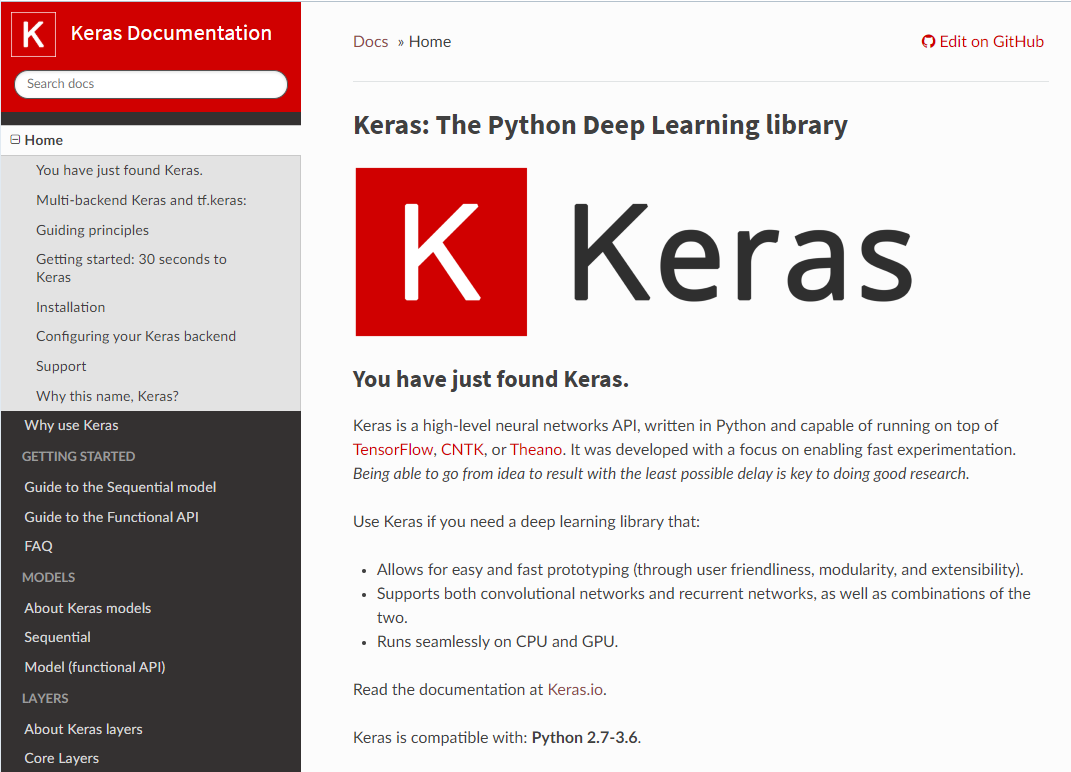

In [25]:
from IPython.display import Image
Image('Keras.png')

## Framework Keras 

Keras is a high-level neural networks API, i.e., o Keras é um framework de alto nível para trabalho com redes neurais.

É escrito em Python - e sua execução ocorre sobre os frameworks TensorFlow, Theano e CNTK. 

O objetivo do Keras é permitir e facilitar experimentações rápidas de aprendizagem profunda, sem a necessidade de construção completa em código das estruturas das RNAs (responsabilidade dos frameworks Theano e TensorFlow)

In [26]:
# Instalação pip framework Theano
# !pip install theano


In [27]:
# Instalação pip framework Tensorflow
# !pip install tensorflow

In [28]:
# Instalação pip do Framework Keras
# !pip install keras

In [29]:
# Instalação de Visualizador de RNA
# !pip install ann_visualizer

In [30]:
# ====================================================================
# Carregamento os pacotes necessários para trabalhar com os Frameworks

# Carregamento das bibliotecas numpy e pandas, Keras e sklearn
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split


In [31]:
# =========================================================================================
# Carregamento do Dataset usado para treinamento do modelo de DL

# Carregamento do arquivo .csv com dados de crédito de diversos clientes
dataset = pd.read_csv("credit_dataset.csv")

# Visualização do dataset normalizado
dataset.head()


,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2


In [32]:
# =========================================================================================
# Pré-processamento - aplicando normalização no conjunto de dados

# Lista de variáveis explanatórias que iremos normalizar
feature_list_norm = ["credit.duration.months", "age", "credit.amount"]

# Criando dataset normalizado
dataset_norm = dataset

# Aplicação da normalização sobre o dataset
dataset_norm[feature_list_norm] = dataset_norm[feature_list_norm].apply(lambda x: (x - x.mean()) / x.std())

# Visualização do dataset normalizado
dataset_norm.head()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,-0.240737,3,2,-0.787263,1,1,4,1,...,4,2,-1.280932,2,1,1,3,1,1,1
1,1,1,-0.987079,3,4,-0.167301,1,2,2,3,...,2,1,0.040343,2,1,2,3,2,1,1
2,1,2,-0.738298,2,4,-0.860950,2,3,2,1,...,4,1,-1.104762,2,1,1,2,1,1,1
3,1,1,-0.738298,3,4,-0.407137,1,2,3,3,...,2,1,0.304598,2,1,2,2,2,1,2
4,1,1,-0.738298,3,4,-0.389779,1,2,4,3,...,4,2,0.216513,1,2,2,2,1,1,2


In [33]:
# =========================================================================================
# Uso da função train_test_split do sklearn para separação dos dados de treinamento e teste

# Preparação dos dados - características (variáveis explanatórias) e variável classe de saída

# Variáveis de entrada do modelo
X = dataset_norm.iloc[:,1:]

# Variável de saída do modelo
y = dataset_norm.iloc[:,0]

# Uso do seed para reprodução dos mesmos resultados
seed = 101
np.random.seed(seed)

# Proporção dos dados de teste do modelo
p_teste = 0.3

# Função train_test_split para separação dos dados com proporção de teste escolhida
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = p_teste, random_state = seed)

In [34]:
# =========================================================================================
# Criação do Modelo de Deep Learning com o Keras

# No Keras, podemos usar o comando Sequential para construir a sequência de camadas da RNA
modelo_RNA_Keras = Sequential()

# A partir da criação do objeto modelo do Keras, podemos adicionar camadas:
modelo_RNA_Keras.add(Dense(12, input_dim = 20, kernel_initializer = 'uniform', activation = 'relu'))
# Dicas:
# i)   adicionamos uma camada densa composta por 12 neurônios após a camada de entrada que é alimentada por 20 sinais (características) 
# ii)  precisamos fazer a inicialização das matrizes de parâmetros das RNAs, certo. O kernel_initializer especifica a distribuição de probabilidade que podemos usar para fazer essa inicialização
# iii) https://keras.io/initializers/#randomnormal - inicializações
# iv)  activation function -> aqui podemos especificar o tipo de função de ativação usada nos neurônios da RNA, i.e., função g() do material. No caso usamos a relu ()
# v)   https://keras.io/activations/
# vi)  Devemos ter cautela na adição da primeira camada: perceba que o modelo precisa conhecer o formato de entrada, i.e., número de características. Por essa razão, a primeira camada do modelo Sequential
#      precisa receber a informação específica de entrada (input_dim)

# Exemplo: vetor de características de entrada com tamanho 784
# model = Sequential()
# model.add(Dense(32, input_shape=(784,)))

# --------------------------------------------------------------
# Adição da segunda camada a rede neural profunda
modelo_RNA_Keras.add(Dense(8, kernel_initializer = 'uniform', activation = 'relu'))
# Dicas:
# Nesse caso, adicionamos uma camada oculta de 8 neurônios, cujos parâmetros são inicializados a partir da distribuição uniforme e com funções de ativação do tipo relu.

# --------------------------------------------------------------
# Adição da camada de saída a rede neural profunda
modelo_RNA_Keras.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'uniform'))
# Dicas:
# Nesse caso, temos a adição de um único neurônio de saída com função de ativação do tipo sigmoid e seu parâmetro de ajuste também é inicializado a partir da distribuição uniforme


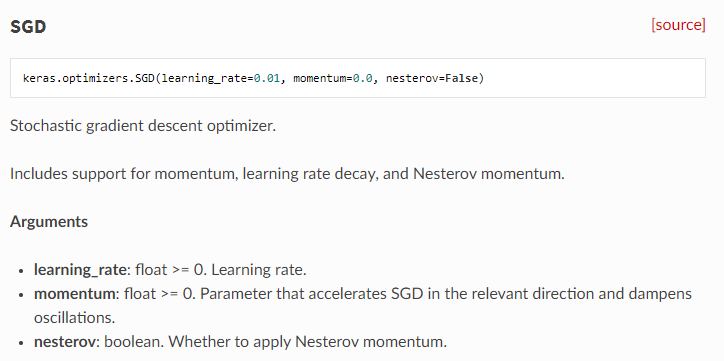

In [35]:
# ===========================================================================================
# Compilação do Modelo de Deep Learning no Keras

# Antes de treinarmos o modelo DL, precisamos configurar o processo de treinamento - realizado no Keras com um método de compilação. 
# Precisamos nos atentar aqui para três argumentos importantes:

# i)   o otimizador (optimizer): uma string de identificação do otimizador a ser usado. Temos diferentes otimizadores (SGD - Stochastic gradient descent, RMSprop): https://keras.io/optimizers/
# ii)  a função custo a ser minimizada com o otimizador escolhido: podemos escolher a cross_entropy, mse, entre outras): https://keras.io/losses/
# iii) métrica de desempenho: Perceba que a métrica é similar a função custo, exceto pelo fato de que os resultados da avaliação da métrica não são usados ao treinar o modelo :https://keras.io/metrics/

# Dica de ouro 1: compreender a relação entre o otimizador usado, função custo relacionada ao problema que desejamos solucionar e a métrica é um aspecto de relevância para o desempenho do modelo de DL. 
# Dica de ouro 2: A metric function is similar to a loss function, except that the results from evaluating a metric are not used when training the model.
# Dica de ouro 3: a métrica de desempenho é usada para avaliar o modelo e não treiná-lo, enquanto a função custo (essa sim) é usada no treinamento.
# Dica de outo 4: reparem que estamos utilizando o gradiente descendente estocástico (SGD) como otimizador. Essa abordagem permite conduzir a descida do gradiente a partir de amostras
# aleatórias dos dados de treinamento, sem a necessidade de cálculo do gradiente para todos os exemplos de treino (o que aumentaria consideravelmente o processamento em DL). 
# Com isso, existe a possibilidade do gradiente descer em direções não ótimas para o mínimo global. O parâmetro momentum é usado para corrigir direções de descida do gradiente estocástico. 

# Configurações para compilação do modelo de DL no Keras
modelo_RNA_Keras.compile(loss = 'binary_crossentropy', 
                         optimizer = SGD(lr = 0.005, momentum = 0.9, nesterov = True), 
                         metrics = ['accuracy'])
# Configurações:
# Usamos o gradiente descendente estocásticos para conduzir o processo de treinamento da rede neural profunda com:
# taxa de aprendizagem (alpha do material) = 0.01
# nesterov momentum habilitado para acelerar a convergência do gradiente
from IPython.display import Image
Image('sgd.png')


In [36]:
# ===========================================================================================
# Treinamento do Modelo de Deep Learning após a construção e compilação 

# Usamos a função fit para conduzir o treinamento do modelo, considerando:
# i)  objeto do modelo criado no Keras
# ii) modelo compilado com as configurações de treinamento
modelo_RNA_Keras.fit(X_train, y_train, epochs = 100, batch_size = 10)
# Dicas
# i)   enviamos os dados de treinamento (X_train e y_train)
# ii)  parametrizamos a quantidade de epochs - que consiste em um parâmetro que nos indica quantas vezes iremos iterar o processo de aprendizagem sobre os dados de treinamento
# iii) o modelo é atualizado a cada processamento em batch - isso significa que nós podemos ser várias atualizações do modelo duranet um epoch

# Para compreendermos o batch size - lembre-se que a camada de entrada da RNA é alimentada com a quantidade de features (n) do modelo.input
# Para cada uma dessas features - que são nossas variáveis explicativas - temos diversos exemplos de treinamento (m)
# Formamos um batch (batelada) de alguns exemplos de treinamento e apresentamos a rede RNA
# Após a apresentamos desses mini-batches - calculamos o custo e atualizamos a RNA
# Fazemos isso para os vários exemplos de treinamento (m) e concluimos uma "visita" aos dados - chamada de epoch.  
# Logo: batch size não é a mesma coisa que epoch


Epoch 1/100
700/700 [==============================] - 0s 290us/step - loss: 0.6570 - accuracy: 0.6914
Epoch 2/100
700/700 [==============================] - 0s 138us/step - loss: 0.6188 - accuracy: 0.7000
Epoch 3/100
700/700 [==============================] - 0s 156us/step - loss: 0.6123 - accuracy: 0.7000
Epoch 4/100
700/700 [==============================] - 0s 156us/step - loss: 0.6113 - accuracy: 0.7000
Epoch 5/100
700/700 [==============================] - 0s 256us/step - loss: 0.6111 - accuracy: 0.7000
Epoch 6/100
700/700 [==============================] - 0s 184us/step - loss: 0.6111 - accuracy: 0.7000
Epoch 7/100
700/700 [==============================] - 0s 174us/step - loss: 0.6105 - accuracy: 0.7000
Epoch 8/100
700/700 [==============================] - 0s 165us/step - loss: 0.6105 - accuracy: 0.7000
Epoch 9/100
700/700 [==============================] - 0s 142us/step - loss: 0.6099 - accuracy: 0.7000
Epoch 10/100
700/700 [==============================] - 0s 162us/step - l

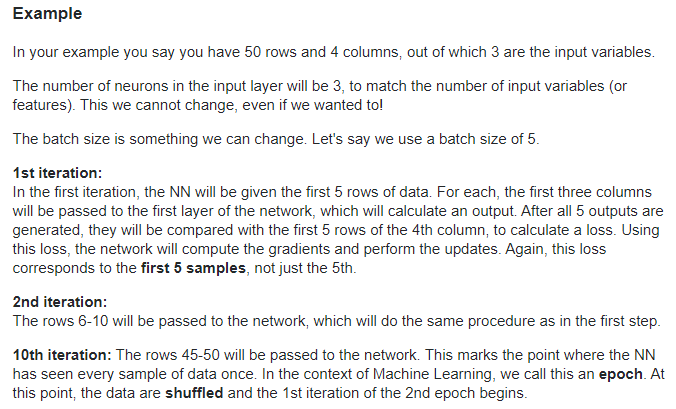

In [37]:
from IPython.display import Image
Image('batch_size_epoch.png')

In [38]:
from ann_visualizer.visualize import ann_viz;
ann_viz(modelo_RNA_Keras, title="My first neural network")

Error: Could not open "network.gv.pdf" for writing : Permission denied


CalledProcessError: Command '['dot', '-Tpdf', '-O', 'network.gv']' returned non-zero exit status 1. [stderr: b'Error: Could not open "network.gv.pdf" for writing : Permission denied\r\n']

In [39]:
# =============================================================================================
# O Resultado do Processo de Treinamento da Rede pode ser obtido com os seus pesos (parâmetros)
modelo_RNA_Keras.get_weights()
modelo_RNA_Keras.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 12)                252       
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 9         
Total params: 365
Trainable params: 365
Non-trainable params: 0
_________________________________________________________________


In [44]:
# ===============================================================
# Avaliando a Performance do Modelo - Validação da RNA

# Vamos fazer a validação do modelo de DL com a RNA

# Reparem: temos os dados de treinamento, validação e teste
modelo_RNA_Keras.fit(X_train, y_train, validation_split = 0.3, epochs = 150, batch_size = 10)

# Dicas:
# i)   o uso dos dados de validação permite fazer a validação do modelo sobre a métrica de desempenho usada. O que isso significa?
# ii)  o conjunto de dados de validação é um subconjunto removido do treino e usado para verificar a performance durante o processo de aprendizagem de parâmetros da RNA 
# iii) o conjunto de dados de teste é usado para testar o modelo após a conclusão do processo de aprendizagem de parâmetros da RNA 

# Dica de ouro: perceba que o score da RNA profunda obtido sobre os dados de treino é enviesado. Por isso, precisamos validar o modelo, antes de testá-lo. 
# https://machinelearningmastery.com/difference-test-validation-datasets/


 - 0s 130us/step - loss: 0.3581 - accuracy: 0.8344 - val_loss: 0.7505 - val_accuracy: 0.7204
Epoch 15/150
489/489 [==============================] - 0s 245us/step - loss: 0.3428 - accuracy: 0.8487 - val_loss: 0.7005 - val_accuracy: 0.7109
Epoch 16/150
489/489 [==============================] - 0s 232us/step - loss: 0.3717 - accuracy: 0.8282 - val_loss: 0.7576 - val_accuracy: 0.7251
Epoch 17/150
489/489 [==============================] - 0s 214us/step - loss: 0.3515 - accuracy: 0.8569 - val_loss: 0.7422 - val_accuracy: 0.7109
Epoch 18/150
489/489 [==============================] - 0s 153us/step - loss: 0.3600 - accuracy: 0.8405 - val_loss: 0.7641 - val_accuracy: 0.7299
Epoch 19/150
489/489 [==============================] - 0s 186us/step - loss: 0.3504 - accuracy: 0.8384 - val_loss: 0.7221 - val_accuracy: 0.6682
Epoch 20/150
489/489 [==============================] - 0s 198us/step - loss: 0.3612 - accuracy: 0.8405 - val_loss: 0.7568 - val_accuracy: 0.7393
Epoch 21/150
489/489 [=========

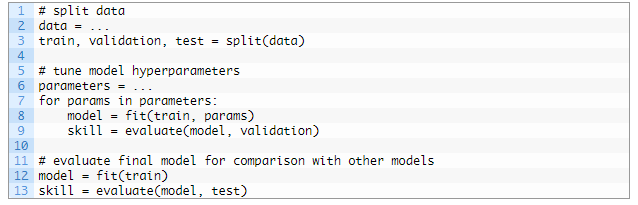

In [41]:
from IPython.display import Image
Image('validation_set.png')

In [42]:
# ===============================================================
# Avaliando a Performance do Modelo - Teste do Modelo DL com RNA

# Vamos fazer o teste do modelo de DL com RNA, após a sua validação, sobre os dados de teste. 
# Avalia os resultados do modelo
scores = modelo_RNA_Keras.evaluate(X_test, y_test)
print("%s: %.2f%%" % (modelo_RNA_Keras.metrics_names[1], scores[1]*100))

300/300 [==============================] - 0s 70us/step
accuracy: 73.00%


In [43]:
# ===============================================================
# Avaliação a Performance do Modelo Graficamente

# Classes de teste (previamente conhecidas nos dados de teste)
# y_test = pd.DataFrame(y_test)
y_test

# Classes preditas pela RNA
# pred = modelo_RNA_Keras.predict_classes(X_test)
pred = modelo_RNA_Keras.predict_classes(X_test)

# Criação de um dataframe pandas que amarzena as predições (classes) e os valores verdadeiros

# type(y_test)
# type(pred)
df = pd.DataFrame(data=np.column_stack((pred,y_test)),columns=['predição','teste'])
Acuracy = sum((df.predição == df.teste))/len(df.predição)
Acuracy*100

# Matriz de Confusão 
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)


array([[ 37,  53],
       [ 28, 182]], dtype=int64)